In [3]:
import foolbox as fb
import torch
import torchvision
import tensorflow as tf
import numpy as np

ImportError: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet


In [2]:
!pip3 install foolbox==3.2.1

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip3 install torchvision

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


In [5]:
torch.__version__

NameError: name 'torch' is not defined

In [8]:
torch.cuda.is_available()
# this is sad

False

In [9]:
model = torchvision.models.resnet18(pretrained=True)
model = model.eval()

In [10]:

tf.config.list_physical_devices('GPU')

[]

In [11]:
model = tf.keras.applications.ResNet50(weights="imagenet")

In [12]:
preprocessing = dict(flip_axis=-1, mean=[103.939, 116.779, 123.68])
bounds = (0, 255)
fmodel = fb.TensorFlowModel(model, bounds=bounds, preprocessing=preprocessing)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


In [13]:
fmodel = fmodel.transform_bounds((0, 1))

In [14]:
assert fmodel.bounds == (0, 1)

In [15]:
images, labels = fb.utils.samples(fmodel, dataset='imagenet', batchsize=16)

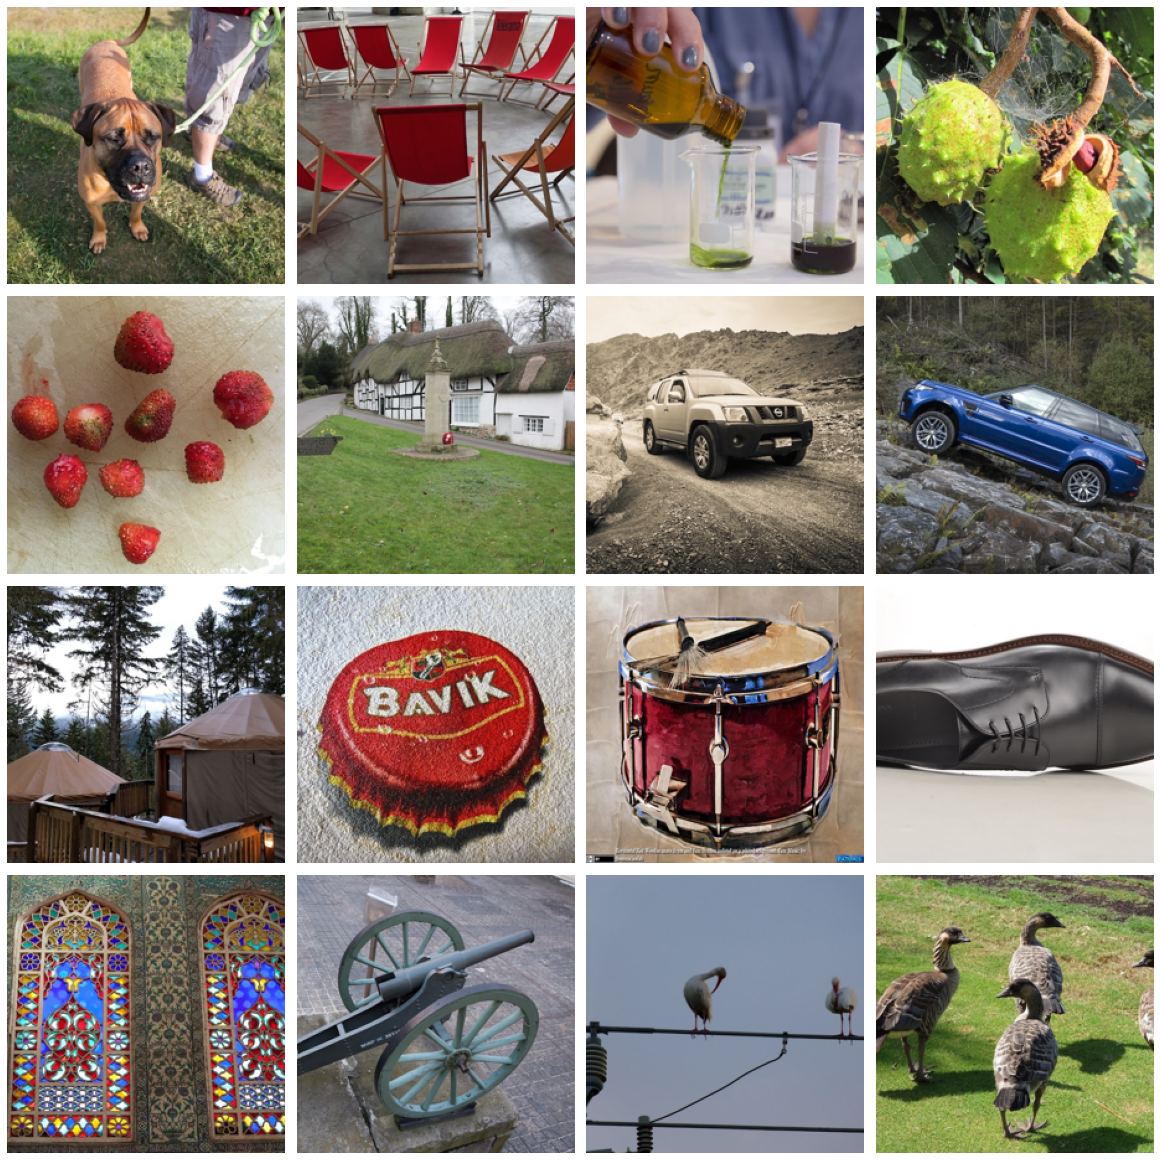

In [16]:
fb.plot.images(images,n=16, ncols=4, nrows=4, scale=4)
# first look at our batch

In [17]:
labels
# https://www.kaggle.com/keras/resnet50
# label strings would be nice

<tf.Tensor: shape=(16,), dtype=int32, numpy=
array([243, 559, 438, 990, 949, 853, 609, 609, 915, 455, 541, 630, 741,
       471, 129,  99])>

In [18]:
fb.utils.accuracy(fmodel, images, labels)
# mediocre but expected

0.875

In [19]:
type(images), images.shape

(tensorflow.python.framework.ops.EagerTensor, TensorShape([16, 224, 224, 3]))

In [20]:
type(labels), labels.shape

(tensorflow.python.framework.ops.EagerTensor, TensorShape([16]))

In [50]:
attack = fb.attacks.LinfDeepFoolAttack()
# classfoolbox.attacks.LinfDeepFoolAttack(*, steps=50, candidates=10, overshoot=0.02, loss='logits')
# "A simple and fast gradient-based adversarial attack." fast, not for me (:
# further tests with gradient descent ?
# check https://foolbox.readthedocs.io/en/stable/modules/attacks.html for more attack types
# takes approx. 5 min on my machine

In [51]:
raw, clipped, is_adv = attack(fmodel, images, labels, epsilons=0.03)

In [52]:
is_adv
# thats nice, 0.03 seems like a decent epsilon to start with

<tf.Tensor: shape=(16,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])>

In [53]:
# epsilons = np.linspace(0.002, 0.005, num=10)
# more epsilons would be nice, runtime issues

In [54]:
# raw, clipped, is_adv = attack(fmodel, images, labels, epsilons=epsilons)

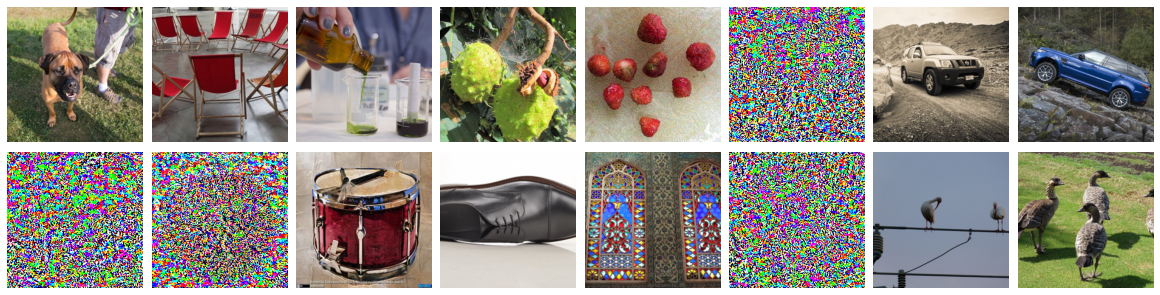

In [55]:
fb.plot.images(raw, ncols=8, nrows=2, scale=2)
# .__.

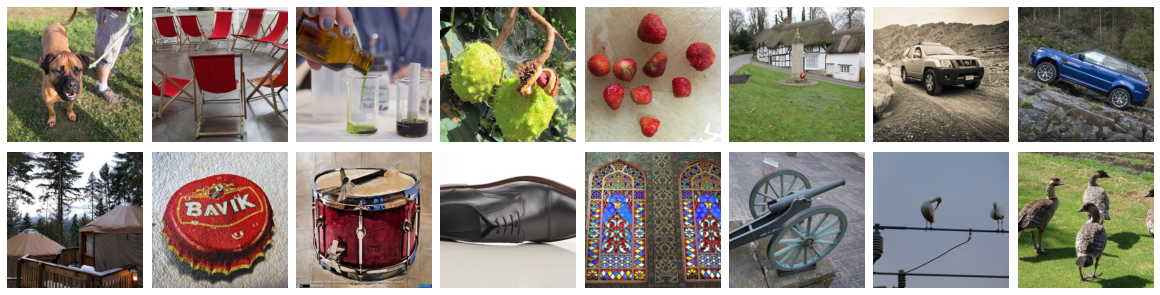

In [59]:
fb.plot.images(images, ncols=8, nrows=2, scale=2)

In [62]:
is_adv.shape

TensorShape([16])

In [63]:
is_adv

<tf.Tensor: shape=(16,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])>

In [64]:
labels

<tf.Tensor: shape=(16,), dtype=int32, numpy=
array([243, 559, 438, 990, 949, 853, 609, 609, 915, 455, 541, 630, 741,
       471, 129,  99])>

In [65]:
#target_classes, could be anything, pick a number
#here we just add 200 (mod 1000)
target_classes = (labels + 200) % 1000

In [66]:
target_classes

<tf.Tensor: shape=(16,), dtype=int32, numpy=
array([443, 759, 638, 190, 149,  53, 809, 809, 115, 655, 741, 830, 941,
       671, 329, 299])>

In [174]:
criterion = fb.criteria.TargetedMisclassification(target_classes)
# target misclassification is the real deal

In [175]:
attack = fb.attacks.L2CarliniWagnerAttack(steps=1000)
# example proposes 100 steps, 1000 steps necessary for reasonable results
# runtime = 20h on my toaster

In [176]:
# epsilons = np.linspace(0.0, 10.0, num=10) ????
epsilons = None
# not today im sorry

In [177]:
print(epsilons)

None


In [178]:
advs, _, is_adv = attack(fmodel, images, criterion, epsilons=epsilons)

In [179]:
is_adv

<tf.Tensor: shape=(16,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True])>

In [180]:
fb.distances.l2(images, advs)

<tf.Tensor: shape=(16,), dtype=float32, numpy=
array([  1.2250429 ,   3.1569264 ,   0.7199992 ,   1.6906406 ,
         1.3133028 ,   1.1705433 ,   0.6955612 ,   1.7117004 ,
         7.0442405 ,   1.5797833 ,   2.259976  ,   1.0239425 ,
       175.09735   ,   0.80946934,  10.523919  ,   1.7419125 ],
      dtype=float32)>

In [1]:
fb.plot.images(images, ncols=3, nrows=2, scale=2)

NameError: name 'fb' is not defined

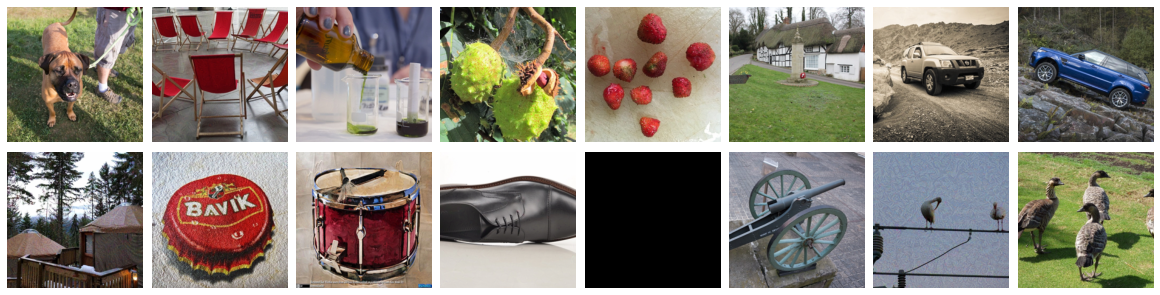

In [182]:
fb.plot.images(advs, ncols=8, nrows=2, scale=2)

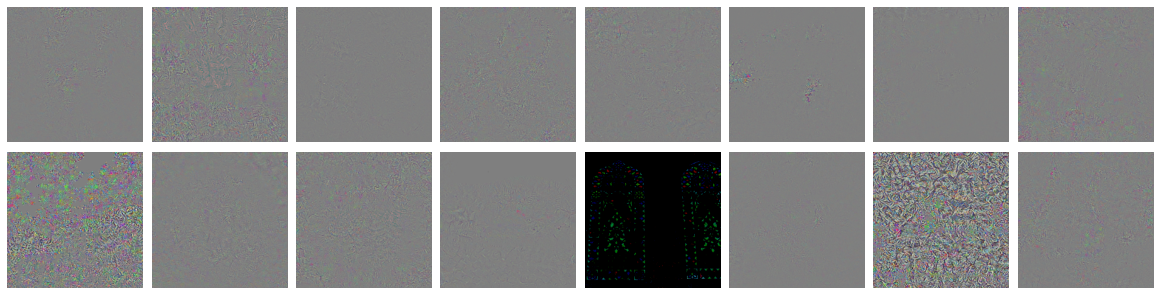

In [185]:
fb.plot.images(advs - images, ncols=8, nrows=2, scale=2, bounds=(-0.1, 0.1))
# very little noise for most of the examples